In [74]:
"""
# CODSOFT - Movie Genre Classification  
## 📌 Project Task: Predict Movie Genres Based on Plot Summaries
This project is part of the **CODSOFT internship program**.  
We use **Machine Learning & NLP techniques** to classify movie genres based on plot descriptions.

---
## 📌 Steps Completed

### **Step 1: Data Loading & Exploration**
- Downloaded the dataset from **Kaggle** and extracted the files.
- Loaded the dataset and **explored unique genres** and sample movie descriptions.

### **Step 2: Data Preprocessing & Text Cleaning**
- Removed **special characters, stopwords, and punctuation**.
- Converted text to **lowercase** and performed **Tokenization & Lemmatization**.
- Created a new `Cleaned_Description` column.

### **Step 3: Feature Extraction Using TF-IDF**
- Used **TfidfVectorizer** to convert text data into numerical vectors:
  - `max_features=5000` (top 5000 most important words)
  - **Unigrams & Bigrams** (`ngram_range=(1,2)`)
  - Removed **stopwords** for better performance.

### **Step 4: Encoding Target Variable (Genres)**
- Used `LabelEncoder` to convert **movie genres into numerical labels**.
- Stored the encoding **mapping** for reference.

### **Step 5: Splitting Data for Training & Testing**
- Split the dataset into:
  - **80% Training Data**
  - **20% Testing Data**
- Used `stratify=y` to **preserve class distribution**.

### **Step 6: Model Training**
- Implemented and trained multiple classification models:
  - **Logistic Regression**
  - **Support Vector Machine (SVM)**
  - **Weighted SVM (to handle class imbalance)**
  - **Random Forest Classifier**
  - **Naive Bayes (MultinomialNB)**

### **Step 7: Model Evaluation**
- Evaluated models using:
  - **Accuracy Score**
  - **Classification Report** (Precision, Recall, F1-Score)
  - **Confusion Matrices** to visualize misclassifications.

---

### **Attempted SMOTE (Synthetic Minority Oversampling) but encountered issues.**
"""

'\n# CODSOFT - Movie Genre Classification  \n## 📌 Project Task: Predict Movie Genres Based on Plot Summaries\nThis project is part of the **CODSOFT internship program**.  \nWe use **Machine Learning & NLP techniques** to classify movie genres based on plot descriptions.\n\n---\n## 📌 Steps Completed\n\n### **Step 1: Data Loading & Exploration**\n- Downloaded the dataset from **Kaggle** and extracted the files.\n- Loaded the dataset and **explored unique genres** and sample movie descriptions.\n\n### **Step 2: Data Preprocessing & Text Cleaning**\n- Removed **special characters, stopwords, and punctuation**.\n- Converted text to **lowercase** and performed **Tokenization & Lemmatization**.\n- Created a new `Cleaned_Description` column.\n\n### **Step 3: Feature Extraction Using TF-IDF**\n- Used **TfidfVectorizer** to convert text data into numerical vectors:\n  - `max_features=5000` (top 5000 most important words)\n  - **Unigrams & Bigrams** (`ngram_range=(1,2)`)\n  - Removed **stopwords*

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [10]:
!pip install opendatasets

In [11]:
import opendatasets as od

In [12]:
dataset = 'https://www.kaggle.com/datasets/hijest/genre-classification-dataset-imdb'

In [13]:
od.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  rokayaabdelwahed


Your Kaggle Key:

  ········


Dataset URL: https://www.kaggle.com/datasets/hijest/genre-classification-dataset-imdb


100%|█████████████████████████████████████████████████████████████████████████████| 41.7M/41.7M [00:24<00:00, 1.82MB/s]


In [14]:
import os

In [15]:
data_dir = '.\genre-classification-dataset-imdb'

In [16]:
os.listdir(data_dir)

['Genre Classification Dataset']

In [17]:
import os
nested_dir = os.path.join(data_dir, "Genre Classification Dataset") 
os.listdir(nested_dir)

['description.txt',
 'test_data.txt',
 'test_data_solution.txt',
 'train_data.txt']

In [18]:
for file in os.listdir(nested_dir):
    file_path = os.path.join(nested_dir, file)
    print(f"\nContents of {file}:")
    with open(file_path, "r", encoding="utf-8") as f:
        for _ in range(5):  
            print(f.readline().strip())


Contents of description.txt:
Train data:
ID ::: TITLE ::: GENRE ::: DESCRIPTION
ID ::: TITLE ::: GENRE ::: DESCRIPTION
ID ::: TITLE ::: GENRE ::: DESCRIPTION
ID ::: TITLE ::: GENRE ::: DESCRIPTION

Contents of test_data.txt:
1 ::: Edgar's Lunch (1998) ::: L.R. Brane loves his life - his car, his apartment, his job, but especially his girlfriend, Vespa. One day while showering, Vespa runs out of shampoo. L.R. runs across the street to a convenience store to buy some more, a quick trip of no more than a few minutes. When he returns, Vespa is gone and every trace of her existence has been wiped out. L.R.'s life becomes a tortured existence as one strange event after another occurs to confirm in his mind that a conspiracy is working against his finding Vespa.
2 ::: La guerra de papá (1977) ::: Spain, March 1964: Quico is a very naughty child of three belonging to a wealthy middle-class family. Since Cristina's birth, he feels he has lost the privileged position of "prince" of the house fo

In [19]:
import pandas as pd
import os
train_file = os.path.join(nested_dir, "train_data.txt")
df_train = pd.read_csv(train_file, delimiter=" ::: ", engine="python", header=None, names=["ID", "Title", "Genre", "Description"])
df_train.head()

,ID,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [20]:
test_file = os.path.join(nested_dir, "test_data.txt")
df_test = pd.read_csv(test_file, delimiter=" ::: ", engine="python", header=None, names=["ID", "Title", "Description"])
df_test.head()

,ID,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apart..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty chi..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family o...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with his..."
4,5,Er nu zhai (1955),Before he was known internationally as a marti...


In [21]:
solution_file = os.path.join(nested_dir, "test_data_solution.txt")
df_solution = pd.read_csv(solution_file, delimiter=" ::: ", engine="python", header=None, names=["ID", "Title", "Genre", "Description"])
df_solution.head()

,ID,Title,Genre,Description
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apart..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty chi..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family o...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with his..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a marti...


In [22]:
print("Missing values in train data:\n", df_train.isnull().sum())
print("\nMissing values in test data:\n", df_test.isnull().sum())

Missing values in train data:
 ID             0
Title          0
Genre          0
Description    0
dtype: int64

Missing values in test data:
 ID             0
Title          0
Description    0
dtype: int64


In [29]:
categories = df_train['Genre'].unique()
print("Unique Movie Genres:")
for idx, genre in enumerate(categories, 1):
    print(f"{idx}. {genre}")

Unique Movie Genres:
1. drama
2. thriller
3. adult
4. documentary
5. comedy
6. crime
7. reality-tv
8. horror
9. sport
10. animation
11. action
12. fantasy
13. short
14. sci-fi
15. music
16. adventure
17. talk-show
18. western
19. family
20. mystery
21. history
22. news
23. biography
24. romance
25. game-show
26. musical
27. war


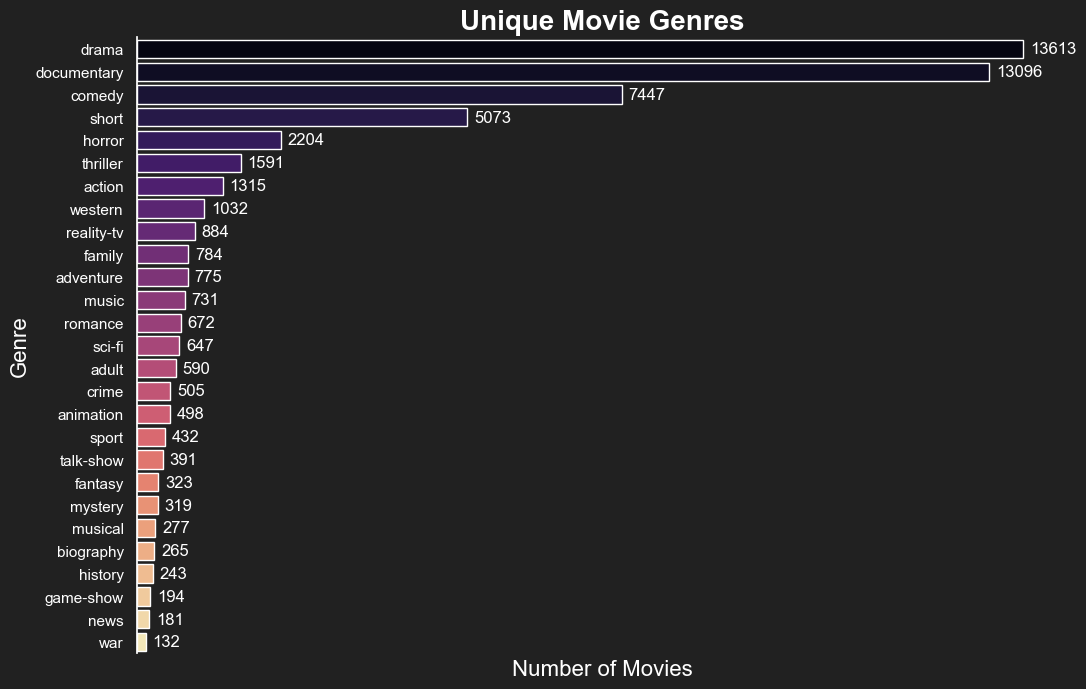

In [67]:
plt.style.use("dark_background")

sns.set_theme(style="darkgrid", rc={"axes.facecolor": "#212121", "figure.facecolor": "#212121"})

plt.figure(figsize=(12, 8))

colors = sns.color_palette("magma", len(df_train['Genre'].unique()))  

ax = sns.countplot(
    data=df_train, 
    y='Genre', 
    order=df_train['Genre'].value_counts().index, 
    palette=colors
)

plt.title('Unique Movie Genres', fontsize=20, fontweight='bold', color="white")
plt.xlabel('Number of Movies', fontsize=16, color="white")
plt.ylabel('Genre', fontsize=16, color="white")

# Remove spines to match dark theme
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(colors="white")

ax.set_xticks([])

for label in ax.get_yticklabels():
    label.set_color("white")

for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', 
                (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='left', va='center', 
                fontsize=12, color='white',  # Change color to white for better visibility
                xytext=(5, 0), textcoords='offset points')

plt.show()

In [32]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    words = word_tokenize(text)  # Tokenize text
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatize & remove stopwords
    return " ".join(words)

df_train['Cleaned_Description'] = df_train['Description'].apply(clean_text)
df_train[['Description', 'Cleaned_Description']].sample(5)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Description,Cleaned_Description
2928,"Daniel, a professional actor, is hired by a No...",daniel professional actor hired north devon vi...
26475,"A small island, a great history. Long before g...",small island great history long giving name co...
1481,Chantel is happy: her son's away at school pla...,chantel happy son away school playing soccer h...
22795,"In a total of 16 short episodes, kids get to g...",total 16 short episode kid get go fun adventur...
11525,An up close look into a live performance of un...,close look live performance underground soul s...


In [34]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text_advanced(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    words = word_tokenize(text)  # Tokenize text
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words and len(word) > 2]  # Remove stopwords and short words
    return " ".join(words)

df_train['Cleaned_Description'] = df_train['Description'].apply(clean_text_advanced)

df_train[['Description', 'Cleaned_Description']].sample(5)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Description,Cleaned_Description
43414,"Cattle Country is a modern-day, western realit...",cattle country modern day western reality seri...
43313,A look at the Armenian people's campaign to pr...,look armenian people campaign preserve forest ...
20922,"June is bringing her beau, Sidney, home to mee...",june bringing beau sidney home meet family thr...
12352,A meditative digital project representing the ...,meditative digital project representing gap ex...
34460,"The Berlin Wall, a civic tragedy in architectu...",berlin wall civic tragedy architecture fall no...


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tfidf = TfidfVectorizer(
    max_features=5000,  # Use top 5000 words
    stop_words="english",
    ngram_range=(1,2)  # Include bigrams (word pairs)
)
X = tfidf.fit_transform(df_train['Cleaned_Description'])
X_df = pd.DataFrame(X.toarray(), columns=tfidf.get_feature_names_out())
X_df.head()


,aaron,abandon,abandoned,abc,abducted,ability,able,aboard,abortion,abroad,...,younger sister,youngest,youngster,youth,youtube,zealand,zero,zombie,zone,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.212394,0.0,0.0,0.0


In [39]:
print(df_train.columns)

Index(['ID', 'Title', 'Genre', 'Description', 'Cleaned_Description'], dtype='object')


In [40]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_train['Genre_Label'] = label_encoder.fit_transform(df_train['Genre'])
genre_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Genre Encoding Mapping:", genre_mapping)

Genre Encoding Mapping: {'action': 0, 'adult': 1, 'adventure': 2, 'animation': 3, 'biography': 4, 'comedy': 5, 'crime': 6, 'documentary': 7, 'drama': 8, 'family': 9, 'fantasy': 10, 'game-show': 11, 'history': 12, 'horror': 13, 'music': 14, 'musical': 15, 'mystery': 16, 'news': 17, 'reality-tv': 18, 'romance': 19, 'sci-fi': 20, 'short': 21, 'sport': 22, 'talk-show': 23, 'thriller': 24, 'war': 25, 'western': 26}


In [41]:
print(df_train.columns)  
print(df_train[['Genre', 'Genre_Label']].head()) 

Index(['ID', 'Title', 'Genre', 'Description', 'Cleaned_Description',
       'Genre_Label'],
      dtype='object')
      Genre  Genre_Label
0     drama            8
1  thriller           24
2     adult            1
3     drama            8
4     drama            8


In [42]:
from sklearn.model_selection import train_test_split

y = df_train['Genre_Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (43371, 5000)
Testing Data Shape: (10843, 5000)


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy Score: 0.5795444065295582

Classification Report:
               precision    recall  f1-score   support

      action       0.52      0.29      0.37       263
       adult       0.69      0.31      0.42       118
   adventure       0.56      0.12      0.20       155
   animation       0.61      0.11      0.19       100
   biography       0.00      0.00      0.00        53
      comedy       0.53      0.60      0.56      1490
       crime       0.21      0.03      0.05       101
 documentary       0.66      0.84      0.74      2619
       drama       0.54      0.76      0.63      2723
      family       0.57      0.10      0.17       157
     fantasy       0.00      0.00      0.00        65
   game-show       0.90      0.46      0.61        39
     history       0.00      0.00      0.00        49
      horror       0.66      0.59      0.62       441
       music       0.62      0.38      0.47       146
     musical       0.67      0.04      0.07        55
     mystery       0.

In [44]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
svm_model = SVC(kernel="linear")
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_)) 

Accuracy Score: 0.582126717698054

Classification Report:
               precision    recall  f1-score   support

      action       0.46      0.35      0.40       263
       adult       0.64      0.48      0.55       118
   adventure       0.49      0.21      0.30       155
   animation       0.51      0.22      0.31       100
   biography       0.00      0.00      0.00        53
      comedy       0.53      0.58      0.55      1490
       crime       0.23      0.03      0.05       101
 documentary       0.67      0.83      0.75      2619
       drama       0.55      0.73      0.63      2723
      family       0.44      0.12      0.19       157
     fantasy       0.33      0.05      0.08        65
   game-show       0.92      0.56      0.70        39
     history       0.00      0.00      0.00        49
      horror       0.67      0.59      0.63       441
       music       0.63      0.49      0.55       146
     musical       0.42      0.09      0.15        55
     mystery       0.3

In [51]:
from sklearn.svm import SVC

svm_model = SVC(kernel="linear", class_weight="balanced")
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_))

SVM Accuracy: 0.49027022041870333
              precision    recall  f1-score   support

      action       0.26      0.49      0.34       263
       adult       0.38      0.59      0.46       118
   adventure       0.20      0.35      0.25       155
   animation       0.23      0.30      0.26       100
   biography       0.03      0.04      0.03        53
      comedy       0.54      0.48      0.51      1490
       crime       0.18      0.31      0.23       101
 documentary       0.77      0.62      0.69      2619
       drama       0.67      0.42      0.52      2723
      family       0.16      0.31      0.21       157
     fantasy       0.09      0.09      0.09        65
   game-show       0.76      0.67      0.71        39
     history       0.11      0.18      0.13        49
      horror       0.59      0.62      0.61       441
       music       0.39      0.74      0.51       146
     musical       0.15      0.16      0.16        55
     mystery       0.14      0.14      0.14    

In [53]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

Random Forest Accuracy: 0.498478280918565
              precision    recall  f1-score   support

      action       0.53      0.03      0.06       263
       adult       0.91      0.17      0.29       118
   adventure       0.68      0.08      0.15       155
   animation       0.00      0.00      0.00       100
   biography       0.00      0.00      0.00        53
      comedy       0.53      0.32      0.40      1490
       crime       1.00      0.01      0.02       101
 documentary       0.56      0.86      0.68      2619
       drama       0.43      0.82      0.57      2723
      family       1.00      0.02      0.04       157
     fantasy       0.00      0.00      0.00        65
   game-show       0.81      0.44      0.57        39
     history       0.00      0.00      0.00        49
      horror       0.57      0.21      0.31       441
       music       0.67      0.15      0.25       146
     musical       1.00      0.02      0.04        55
     mystery       0.00      0.00      

In [54]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb, target_names=label_encoder.classes_))

Naive Bayes Accuracy: 0.5248547449967721
              precision    recall  f1-score   support

      action       0.63      0.09      0.16       263
       adult       0.68      0.11      0.19       118
   adventure       0.70      0.09      0.16       155
   animation       0.00      0.00      0.00       100
   biography       0.00      0.00      0.00        53
      comedy       0.51      0.44      0.47      1490
       crime       0.00      0.00      0.00       101
 documentary       0.57      0.89      0.69      2619
       drama       0.46      0.81      0.59      2723
      family       0.00      0.00      0.00       157
     fantasy       0.00      0.00      0.00        65
   game-show       1.00      0.18      0.30        39
     history       0.00      0.00      0.00        49
      horror       0.72      0.34      0.46       441
       music       0.76      0.11      0.19       146
     musical       0.00      0.00      0.00        55
     mystery       0.00      0.00      0

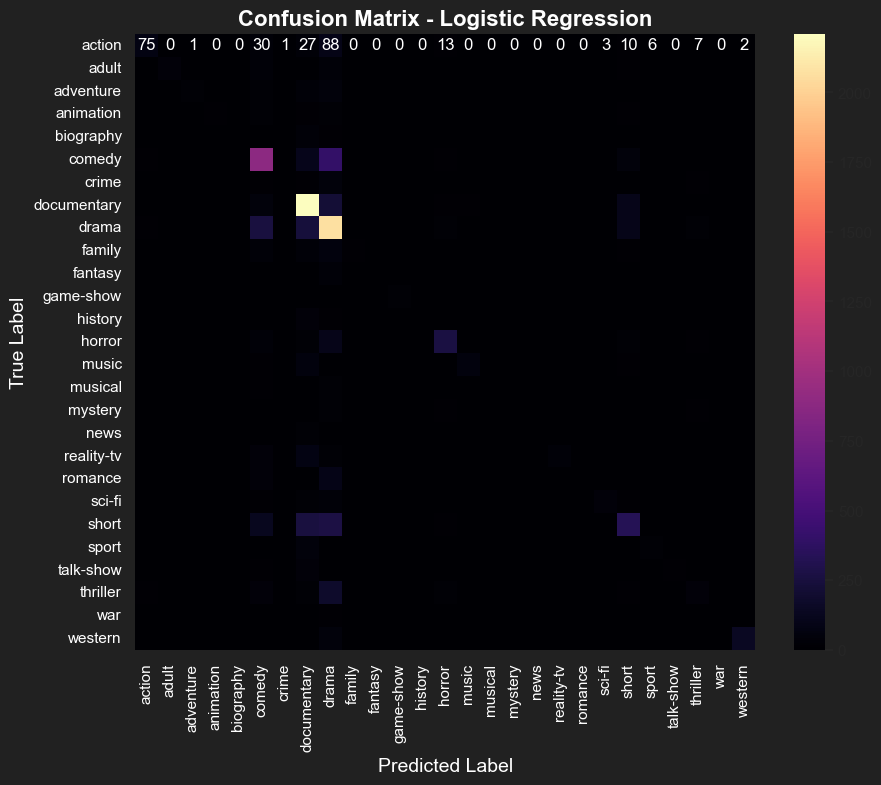

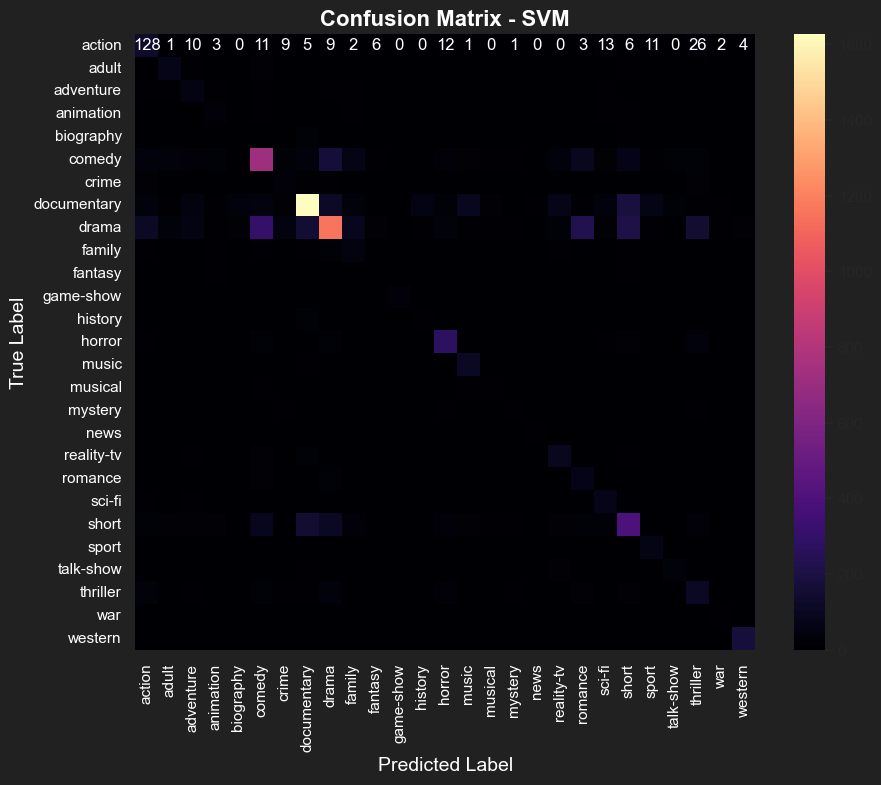

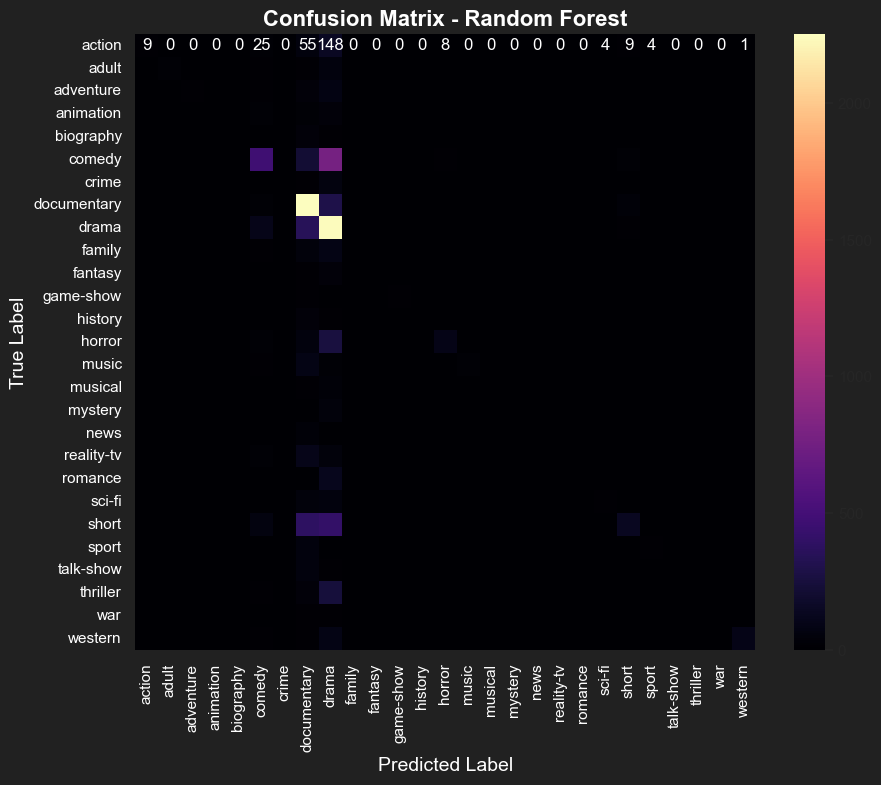

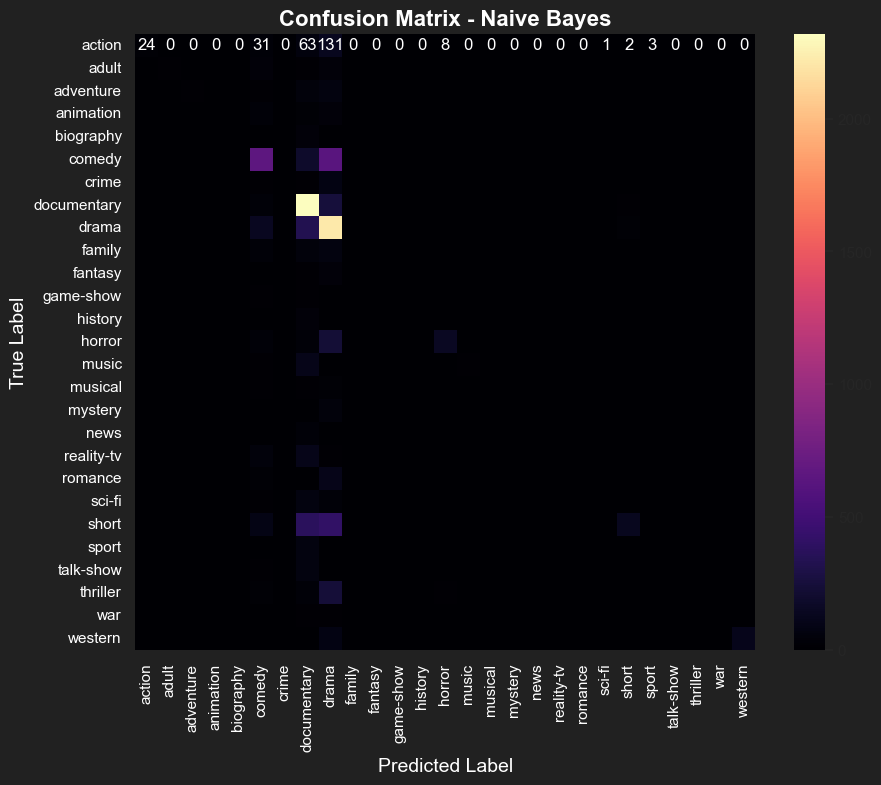

In [68]:
from sklearn.metrics import confusion_matrix

plt.style.use("dark_background")
sns.set_theme(style="darkgrid", rc={"axes.facecolor": "#212121", "figure.facecolor": "#212121"})

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(cm, annot=True, fmt='d', cmap="magma", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    
    plt.xlabel("Predicted Label", fontsize=14, color="white")
    plt.ylabel("True Label", fontsize=14, color="white")
    plt.title(f"Confusion Matrix - {model_name}", fontsize=16, fontweight="bold", color="white")

    ax.tick_params(colors="white")
    
    for label in ax.get_xticklabels():
        label.set_color("white")
    for label in ax.get_yticklabels():
        label.set_color("white")

    plt.show()

# Plot confusion matrices with dark mode adjustments
plot_confusion_matrix(y_test, y_pred, "Logistic Regression")
plot_confusion_matrix(y_test, y_pred_svm, "SVM")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")
plot_confusion_matrix(y_test, y_pred_nb, "Naive Bayes")
